In [1]:
from pprint import pprint

## Problem statement: Identifying key connectors among data scientists

In [15]:
# datadump from Data Sciencester network
users = [
    {"id": 0, "name": "Hero"},
    {"id": 1, "name": "Dunn"},
    {"id": 2, "name": "Sue"},
    {"id": 3, "name": "Chi"},
    {"id": 4, "name": "Thor"},
    {"id": 5, "name": "Clive"},
    {"id": 6, "name": "Hicks"},
    {"id": 7, "name": "Devin"},
    {"id": 8, "name": "Kate"},
    {"id": 9, "name": "Klein"},
]
friendship_pairs = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
                    (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]
interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodel"), (2, "pandas"), (3, "R"), (3, "Python"),
    (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"),
    (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
    (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
    (6, "probability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
    (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
    (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
    (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

salaries_and_tenures = [
    (83000, 8.7),
    (88000, 8.1),
    (48000, 0.7),
    (76000, 6),
    (69000, 6.5),
    (76000, 7.5),
    (60000, 2.5),
    (83000, 10),
    (48000, 1.9),
    (63000, 4.2)
]

paid_acc_by_years_of_experience = [
    (0.7, "paid"),
    (1.9, "unpaid"),
    (2.5, "paid"),
    (4.2, "unpaid"),
    (6, "unpaid"),
    (6.5, "unpaid"),
    (7.5, "unpaid"),
    (8.1, "unpaid"),
    (8.7, "paid"),
    (10, "paid"),
]

# improving friends lookout by id
friendships = {}

for i, j in friendship_pairs:
    friendships.setdefault(i, []).append(j)
    friendships.setdefault(j, []).append(i)

pprint(friendships)

{0: [1, 2],
 1: [0, 2, 3],
 2: [0, 1, 3],
 3: [1, 2, 4],
 4: [3, 5],
 5: [4, 6, 7],
 6: [5, 8],
 7: [5, 8],
 8: [6, 7, 9],
 9: [8]}


### Determining the average number of connections

In [3]:
avg_connections = sum(len(friends) for friends in friendships.values()) / len(friendships)
print("Average number of connections:", round(avg_connections, 2))

Average number of connections: 2.4


### Identifying the most connected individual

This concept is commonly referred to as degree centrality.

In [4]:
connections_by_id = [(id, len(friends)) for id, friends in friendships.items()]
connections_by_id.sort(key=lambda pair: pair[1], reverse=True)
print("List of connections, sorted from the most connected to the least connected:\n", connections_by_id, sep="")

List of connections, sorted from the most connected to the least connected:
[(1, 3), (2, 3), (3, 3), (5, 3), (8, 3), (0, 2), (4, 2), (6, 2), (7, 2), (9, 1)]


## Problem statement: Generating friends suggestions

### Derived from shared connections

In [5]:
from collections import Counter

In [6]:
def friends_of_friends_count(id):
    return Counter(friend_of_friend # user may know this person
                for friend in friendships[id]
                for friend_of_friend in friendships[friend]
                if friend_of_friend not in friendships[id] # not the user's friends
                and friend_of_friend != id) # not the user itself

suggested_by_common_friends = {
    id:dict(friends_of_friends_count(id))
    for id in friendships
}

pprint(suggested_by_common_friends)

{0: {3: 2},
 1: {4: 1},
 2: {4: 1},
 3: {0: 2, 5: 1},
 4: {1: 1, 2: 1, 6: 1, 7: 1},
 5: {3: 1, 8: 2},
 6: {4: 1, 7: 2, 9: 1},
 7: {4: 1, 6: 2, 9: 1},
 8: {5: 2},
 9: {6: 1, 7: 1}}


### Derived from common interests

In [7]:
ids_by_interests = {}

for id, interest in interests:
    ids_by_interests.setdefault(interest, []).append(id)

pprint(ids_by_interests)

{'Big Data': [0, 8, 9],
 'C++': [5],
 'Cassandra': [0, 1],
 'HBase': [0, 1],
 'Hadoop': [0, 9],
 'Haskell': [5],
 'Java': [0, 5, 9],
 'Mahout': [7],
 'MapReduce': [9],
 'MongoDB': [1],
 'NoSQL': [1],
 'Postgres': [1],
 'Python': [2, 3, 5],
 'R': [3, 5],
 'Spark': [0],
 'Storm': [0],
 'artificial intelligence': [8],
 'decision trees': [4],
 'deep learning': [8],
 'libsvm': [4],
 'machine learning': [4, 7],
 'mathematics': [6],
 'neural networks': [7, 8],
 'numpy': [2],
 'pandas': [2],
 'probability': [3, 6],
 'programming languages': [5],
 'regression': [3, 4],
 'scikit-learn': [2, 7],
 'scipy': [2],
 'statistics': [3, 6],
 'statsmodel': [2],
 'theory': [6]}


In [8]:
interests_by_id = {}

for id, interest in interests:
    interests_by_id.setdefault(id, []).append(interest)

pprint(interests_by_id)

{0: ['Hadoop', 'Big Data', 'HBase', 'Java', 'Spark', 'Storm', 'Cassandra'],
 1: ['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres'],
 2: ['Python', 'scikit-learn', 'scipy', 'numpy', 'statsmodel', 'pandas'],
 3: ['R', 'Python', 'statistics', 'regression', 'probability'],
 4: ['machine learning', 'regression', 'decision trees', 'libsvm'],
 5: ['Python', 'R', 'Java', 'C++', 'Haskell', 'programming languages'],
 6: ['statistics', 'probability', 'mathematics', 'theory'],
 7: ['machine learning', 'scikit-learn', 'Mahout', 'neural networks'],
 8: ['neural networks', 'deep learning', 'Big Data', 'artificial intelligence'],
 9: ['Hadoop', 'Java', 'MapReduce', 'Big Data']}


In [26]:
def most_common_interests_with(id):
    return max(Counter(other_id
                    for interest in interests_by_id[id]
                    for other_id in ids_by_interests[interest]
                    if other_id != id))

print(f"User with most common interests with user 0:", most_common_interests_with(0))

User with most common interests with user 0: 9


## Problem statement: Relationship between salary and experience

### Plotting data for analysis

In [13]:
import matplotlib.pyplot as plt

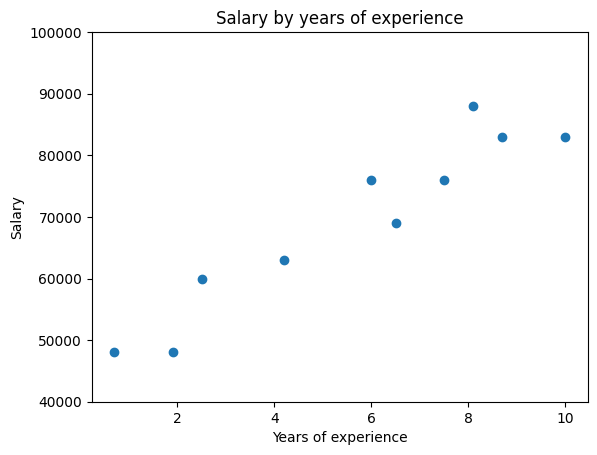

In [16]:
salaries_and_tenures.sort(key=lambda pair: pair[1])
salaries = [salary for salary, tenure in salaries_and_tenures]
tenures = [tenure for salary, tenure in salaries_and_tenures]

plt.plot(tenures, salaries, "o")
plt.ylim(40_000, 100_000)
plt.title("Salary by years of experience")
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.show()

### Calculating average salary by years of experience

In [30]:
avg_salary_by_years = sum(salary / tenure for salary, tenure in salaries_and_tenures) / len(salaries_and_tenures)
print(f"Average salary by years of experience: ${round(avg_salary_by_years, 2)}")

Average salary by years of experience: $19495.44


### Creating tenure buckets for salaries

In [31]:
def tenure_bucket(tenure):
    if tenure < 2:
        return "less than 2"
    elif tenure < 5:
        return "between 2 and 5"
    else:
        return "more than 5"

salary_by_tenure_buckets = {}

for salary, tenure in salaries_and_tenures:
    salary_by_tenure_buckets.setdefault(tenure_bucket(tenure), []).append(salary)

pprint(salary_by_tenure_buckets)

{'between 2 and 5': [60000, 63000],
 'less than 2': [48000, 48000],
 'more than 5': [76000, 69000, 76000, 88000, 83000, 83000]}


### Calculating average salary by tenure bucket

In [32]:
avg_salary_by_bucket = {
    bucket:sum(salaries) / len(salaries)
    for bucket, salaries in salary_by_tenure_buckets.items()
}

pprint(avg_salary_by_bucket)

{'between 2 and 5': 61500.0,
 'less than 2': 48000.0,
 'more than 5': 79166.66666666667}


## Problem statement: Relationship between paid accounts and experience

### Predicting paid accounts based on tenure buckets

In [33]:
def predict_paid_acc(years_of_xp):
    if years_of_xp < 3 or years_of_xp >= 8.5:
        return "paid"
    else:
        return "unpaid"

## Problem statement: Finding most frequent words for blog posts

### Counting the words of user's interests

In [22]:
interests_count = Counter(
    word.lower()
    for user_id, interest in interests
    for word in interest.split()
)

interests_count

Counter({'big': 3,
         'data': 3,
         'java': 3,
         'python': 3,
         'learning': 3,
         'hadoop': 2,
         'hbase': 2,
         'cassandra': 2,
         'scikit-learn': 2,
         'r': 2,
         'statistics': 2,
         'regression': 2,
         'probability': 2,
         'machine': 2,
         'neural': 2,
         'networks': 2,
         'spark': 1,
         'storm': 1,
         'nosql': 1,
         'mongodb': 1,
         'postgres': 1,
         'scipy': 1,
         'numpy': 1,
         'statsmodel': 1,
         'pandas': 1,
         'decision': 1,
         'trees': 1,
         'libsvm': 1,
         'c++': 1,
         'haskell': 1,
         'programming': 1,
         'languages': 1,
         'mathematics': 1,
         'theory': 1,
         'mahout': 1,
         'deep': 1,
         'artificial': 1,
         'intelligence': 1,
         'mapreduce': 1})

### Filtering words count greater than one

In [23]:
for word, count_ in sorted(interests_count.items(), key=lambda pair: (pair[1]), reverse=True):
    if count_ > 1:
        print(f"{word}: {count_}")

big: 3
data: 3
java: 3
python: 3
learning: 3
hadoop: 2
hbase: 2
cassandra: 2
scikit-learn: 2
r: 2
statistics: 2
regression: 2
probability: 2
machine: 2
neural: 2
networks: 2
